In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import pdb

### Mean and STD plot

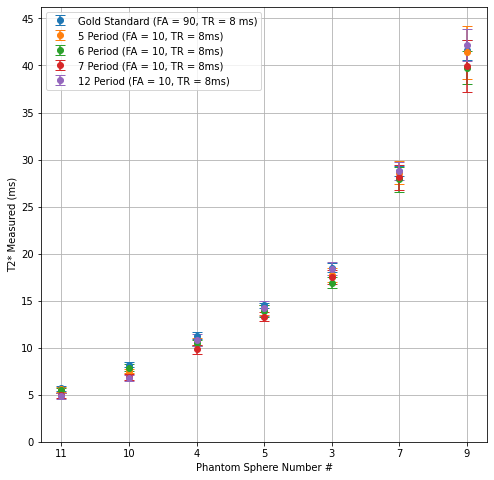

In [15]:
###Mean and STD plot of GOLD standard (90 flip angle) and N-Periodic comparing 

chosedNum = [11,10,4,5,3,7,9]
chosedNum_axis = [str(11),str(10),str(4),str(5),str(3),str(7),str(9)]
tr = 8
fa = 90

###Gold standard
#print(str(tr)+"_"+str(fa))
GOLDSTD_mean = np.asarray([], dtype = float)
GOLDSTD_std = np.asarray([], dtype = float)

T2StarData = np.load("RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
for phantomNum in chosedNum:
    GOLDSTD_mean = np.append(GOLDSTD_mean, np.mean(T2StarData[phantomNum-1,:]))
    GOLDSTD_std = np.append(GOLDSTD_std, np.std(T2StarData[phantomNum-1,:]))
    #print("mean:"+str(np.mean(GOLDSTD_6TR_90[phantomNum-1,:]))+"_sd:"+str(np.std(GOLDSTD_6TR_90[phantomNum-1,:])))
    

fig, ax = plt.subplots(figsize = (8,8))
ax.errorbar(chosedNum_axis,GOLDSTD_mean*1e3,fmt='o', yerr=GOLDSTD_std*1e3,capsize=5, label = f"Gold Standard (FA = {str(fa)}, TR = {str(tr)} ms)")
ax.set_xlabel("Phantom Sphere Number #")
ax.set_ylabel("T2* Measured (ms)")

Period = [5,6,7,12]
###N Periodic 
for P in Period:
    N_Period_mean = np.asarray([], dtype = float)
    N_Period_std = np.asarray([], dtype = float)
    #print(str(tr)+"_"+str(P))
    T2StarData = np.load("RESULT/NPeriodicT2Star/"+str(tr)+"TR_"+str(P)+"_Period_10FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
    for phantomNum in chosedNum:
        N_Period_mean = np.append(N_Period_mean, np.mean(T2StarData[phantomNum-1,:]))
        N_Period_std = np.append(N_Period_std, np.std(T2StarData[phantomNum-1,:]))
        #print("mean:"+str(np.mean(T2StarData[phantomNum-1,:]))+"_sd:"+str(np.std(T2StarData[phantomNum-1,:])))
    ax.errorbar(chosedNum_axis,N_Period_mean*1e3,fmt='o', yerr=N_Period_std*1e3,capsize=5, label = f"{str(P)} Period (FA = 10, TR = {str(tr)}ms)")

    
plt.yticks(np.arange(0, 50, 5))
ax.legend()
ax.grid()
ax.figure.savefig("Mean_STD_Comparing_"+str(tr)+"TR_INRANGE.jpg")

### Bland-Altman Plot

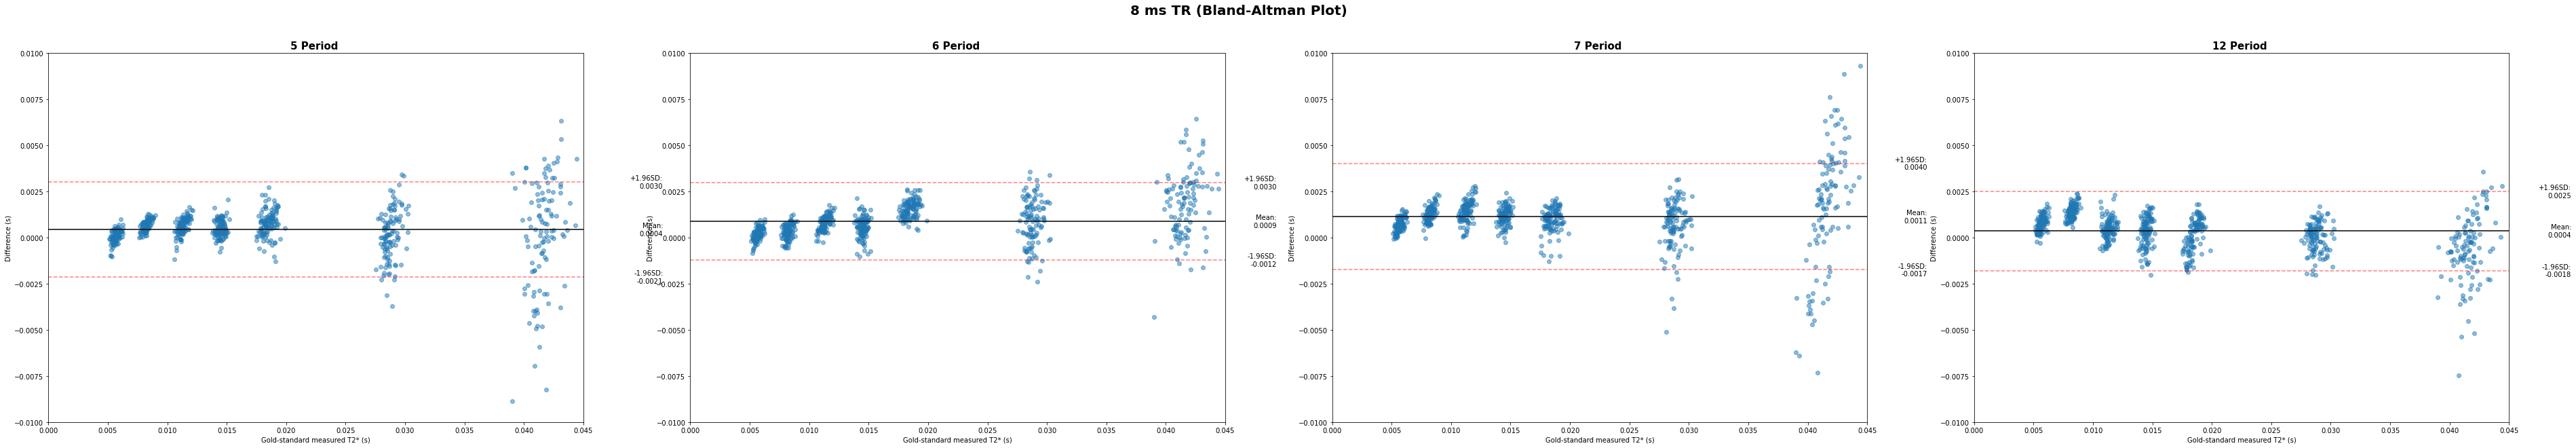

In [76]:
def bland_altman_plot(data1, data2, ax_BA, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd

    ax_BA.scatter(data1, diff, *args, **kwargs, alpha = 0.5)
    ax_BA.axhline(md,           color='black', linestyle='-')
    ax_BA.axhline(md + 1.96*sd, color='red', linestyle='--', alpha = 0.5)
    ax_BA.axhline(md - 1.96*sd, color='red', linestyle='--', alpha =0.5)
    return md, sd, mean, CI_low, CI_high
###-------------------------------------------------------------------

chosedNum = [11,10,4,5,3,7,9]
chosedNum_axis = [str(11),str(10),str(4),str(5),str(3),str(7),str(9),str(13)]
tr = 8
#gold standard
fa = 90

#N-periodic
Period = [5,6,7,12]
P = 12

BA_plot, ax = plt.subplots(1,4,figsize = (65,10))
BA_plot.suptitle(str(tr)+" ms TR (Bland-Altman Plot)", fontweight='bold', fontsize = 20)

###Gold standard
#print(str(tr)+"_"+str(fa))
GOLDSTD_mean = np.asarray([], dtype = float)
GOLDSTD_std = np.asarray([], dtype = float)
GOLDSTD_data = np.asarray([], dtype = float)

T2StarData = np.load("RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
for phantomNum in chosedNum:
    GOLDSTD_data = np.append(GOLDSTD_data, T2StarData[phantomNum-1,:])
    GOLDSTD_mean = np.append(GOLDSTD_mean, np.mean(T2StarData[phantomNum-1,:]))
    GOLDSTD_std = np.append(GOLDSTD_std, np.std(T2StarData[phantomNum-1,:]))
    #print("mean:"+str(np.mean(GOLDSTD_6TR_90[phantomNum-1,:]))+"_sd:"+str(np.std(GOLDSTD_6TR_90[phantomNum-1,:])))
#GOLDSTD_data = GOLDSTD_data.reshape(8, int(np.shape(GOLDSTD_data)[0]/8)) 

i = 0
for P in Period:
    ax_BA = ax[i]
    i = i+1
    ###N Periodic 
    N_Period_data = np.asarray([], dtype = float)
    N_Period_mean = np.asarray([], dtype = float)
    N_Period_std = np.asarray([], dtype = float)
    #print(str(tr)+"_"+str(P))
    T2StarData = np.load("RESULT/NPeriodicT2Star/"+str(tr)+"TR_"+str(P)+"_Period_10FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
    for phantomNum in chosedNum:
        N_Period_data = np.append(N_Period_data, T2StarData[phantomNum-1,:])
        N_Period_mean = np.append(N_Period_mean, np.mean(T2StarData[phantomNum-1,:]))
        N_Period_std = np.append(N_Period_std, np.std(T2StarData[phantomNum-1,:]))
        #print("mean:"+str(np.mean(T2StarData[phantomNum-1,:]))+"_sd:"+str(np.std(T2StarData[phantomNum-1,:])))
    #N_Period_data = N_Period_data.reshape(8, int(np.shape(N_Period_data)[0]/8))


    # Generate some example data
    # diff = N_Period_data - GOLDSTD_data
    # mean = np.mean(diff, axis = 1)
    # std = np.std(diff, axis = 1)

    md, sd, mean, CI_low, CI_high = bland_altman_plot(GOLDSTD_data, N_Period_data, ax_BA)
    #ax_BA.set_title(str(P)+" Period "+ str(tr)+"ms TR", fontweight='bold')
    ax_BA.set_title(str(P)+" Period ", fontweight='bold',fontsize = 15)
    ax_BA.set_xlabel("Gold-standard measured T2* (s)")
    ax_BA.set_ylabel("Difference (s)")
    ax_BA.set_ylim(md - 3.5*sd, md + 3.5*sd)

    xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14

    ax_BA.text(xOutPlot, md - 1.96*sd, 
        r'-1.96SD:' + "\n" + "%.4f" % CI_low, 
        ha = "right",
        va = "center",
        )
    ax_BA.text(xOutPlot, md + 1.96*sd, 
        r'+1.96SD:' + "\n" + "%.4f" % CI_high, 
        ha = "right",
        va = "center",
        )
    ax_BA.text(xOutPlot, md, 
        r'Mean:' + "\n" + "%.4f" % md, 
        ha = "right",
        va = "center",
        )
    #ax_BA.subplots_adjust(right=0.85)
    ax_BA.set_ylim(-0.01,0.01)
    ax_BA.set_xlim(0,0.045)
    

ax_BA.figure.savefig("Bland_Altman_Plots/Bland_Altman_Plot_"+str(tr)+"_TR_ALLPeriod_NEW.jpg")
#ax_BA.figure.savefig("Bland_Altman_Plots/Bland_Altman_Plot_"+str(P)+"Period_"+str(tr)+"_TR.jpg")
#ax_BA.show()

(0.0, 0.045)

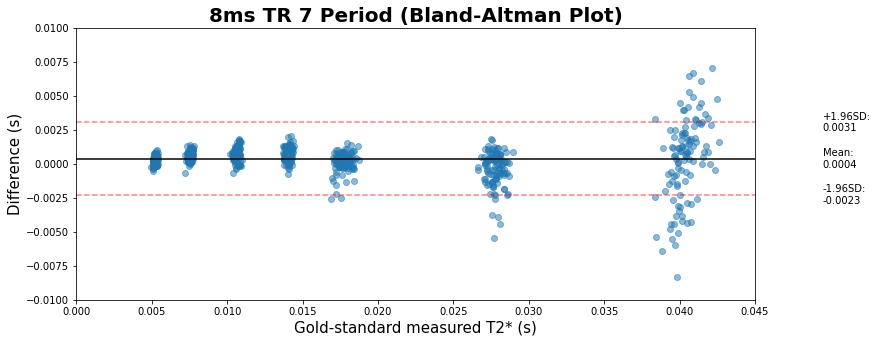

In [25]:
def bland_altman_plot(data1, data2, ax_BA, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd

    ax_BA.scatter(data1, diff, *args, **kwargs, alpha = 0.5)
    ax_BA.axhline(md,           color='black', linestyle='-')
    ax_BA.axhline(md + 1.96*sd, color='red', linestyle='--', alpha = 0.5)
    ax_BA.axhline(md - 1.96*sd, color='red', linestyle='--', alpha =0.5)
    return md, sd, mean, CI_low, CI_high
###-------------------------------------------------------------------

chosedNum = [11,10,4,5,3,7,9]
chosedNum_axis = [str(11),str(10),str(4),str(5),str(3),str(7),str(9),str(13)]
tr = 8
#gold standard
fa = 60

#N-periodic
Period = [5,6,7,12]
P = 7

BA_plot, ax = plt.subplots(1,figsize = (13,5))
#BA_plot.suptitle(str(tr)+" ms TR (Bland-Altman Plot)", fontweight='bold', fontsize = 20)

###Gold standard
#print(str(tr)+"_"+str(fa))
GOLDSTD_mean = np.asarray([], dtype = float)
GOLDSTD_std = np.asarray([], dtype = float)
GOLDSTD_data = np.asarray([], dtype = float)

T2StarData = np.load("RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
for phantomNum in chosedNum:
    GOLDSTD_data = np.append(GOLDSTD_data, T2StarData[phantomNum-1,:])
    GOLDSTD_mean = np.append(GOLDSTD_mean, np.mean(T2StarData[phantomNum-1,:]))
    GOLDSTD_std = np.append(GOLDSTD_std, np.std(T2StarData[phantomNum-1,:]))
    #print("mean:"+str(np.mean(GOLDSTD_6TR_90[phantomNum-1,:]))+"_sd:"+str(np.std(GOLDSTD_6TR_90[phantomNum-1,:])))
#GOLDSTD_data = GOLDSTD_data.reshape(8, int(np.shape(GOLDSTD_data)[0]/8)) 

i = 0

ax_BA = ax
i = i+1
###N Periodic 
N_Period_data = np.asarray([], dtype = float)
N_Period_mean = np.asarray([], dtype = float)
N_Period_std = np.asarray([], dtype = float)
#print(str(tr)+"_"+str(P))
T2StarData = np.load("RESULT/NPeriodicT2Star/"+str(tr)+"TR_"+str(P)+"_Period_10FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
for phantomNum in chosedNum:
    N_Period_data = np.append(N_Period_data, T2StarData[phantomNum-1,:])
    N_Period_mean = np.append(N_Period_mean, np.mean(T2StarData[phantomNum-1,:]))
    N_Period_std = np.append(N_Period_std, np.std(T2StarData[phantomNum-1,:]))
    #print("mean:"+str(np.mean(T2StarData[phantomNum-1,:]))+"_sd:"+str(np.std(T2StarData[phantomNum-1,:])))
#N_Period_data = N_Period_data.reshape(8, int(np.shape(N_Period_data)[0]/8))


# Generate some example data
# diff = N_Period_data - GOLDSTD_data
# mean = np.mean(diff, axis = 1)
# std = np.std(diff, axis = 1)

md, sd, mean, CI_low, CI_high = bland_altman_plot(GOLDSTD_data, N_Period_data, ax_BA)
#ax_BA.set_title(str(P)+" Period "+ str(tr)+"ms TR", fontweight='bold')
plt.title(str(tr)+"ms TR "+str(P)+" Period (Bland-Altman Plot)", fontweight='bold',fontsize = 20)
plt.xlabel("Gold-standard measured T2* (s)",fontsize = 15)
plt.ylabel("Difference (s)",fontsize = 15)
plt.ylim(md - 3.5*sd, md + 3.5*sd)

xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14

plt.text(xOutPlot, md - 1.96*sd, 
    r'-1.96SD:' + "\n" + "%.4f" % CI_low, 
    ha = "left",
    va = "center",
    )
plt.text(xOutPlot, md + 1.96*sd, 
    r'+1.96SD:' + "\n" + "%.4f" % CI_high, 
    ha = "left",
    va = "center",
    )
plt.text(xOutPlot, md, 
    r'Mean:' + "\n" + "%.4f" % md, 
    ha = "left",
    va = "center",
    )
plt.subplots_adjust(right=0.85)
plt.ylim(-0.01,0.01)
plt.xlim(0,0.045)


#ax_BA.figure.savefig("Bland_Altman_Plots/Bland_Altman_Plot_"+str(tr)+"_TR_ALLPeriod_NEW.jpg")
#ax_BA.figure.savefig("Bland_Altman_Plots/Bland_Altman_Plot_"+str(P)+"Period_"+str(tr)+"_TR_v2.jpg")
#ax_BA.show()

## Effective T2* SNR

[11.90508174 12.79732008 14.96526141 16.51522382 10.11955579 12.12050625
  7.39905676]
[ 5.95657395 10.18157598  9.7581287   8.78095878  7.15833166  7.18206438
  4.65811419]
[11.83379517 12.71084774 14.40019    16.50208909  9.0495798  11.51970298
  7.82242039]
[ 5.61502623  5.93468789 10.0922171   6.3546702   8.38947763  6.06357722
  6.40913575]
[11.81377329 12.6022122  14.1521771  17.0228026   8.50707486 11.40215804
  8.10954124]
[4.54345211 5.70082797 5.39978569 7.36378992 6.31174372 5.49118145
 3.89726983]
[11.80625099 12.52019751 13.94005967 16.97578076  8.50044    11.65202096
  9.11550002]
[2.80886347 4.12617292 3.63945838 3.53649749 5.11733306 5.97101466
 4.94533291]


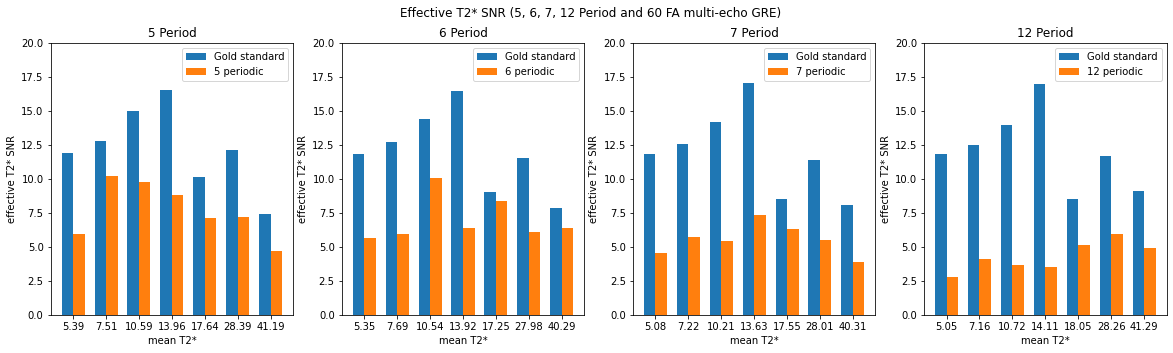

In [24]:
chosedNum = [11,10,4,5,3,7,9]
chosedNum_axis = [str(11),str(10),str(4),str(5),str(3),str(7),str(9)]
Period = [5,6,7,12]
echo = [5,6,7,10]
GOLDstd_time = 26
bar_width = 0.35

#NPeriod_time = [38,39,41,48]
NPeriod_time = [50,52,54,65]
tr = 8
fa = 60
dummyTime = 5000*tr*1e-3
SNR_fig, SNR_ax = plt.subplots(1,4,figsize = (20,5))
SNR_fig.suptitle( 'Effective T2* SNR (5, 6, 7, 12 Period and ' +str(fa)+' FA multi-echo GRE)')
ax1 = [0,0,0,0]
ax2 = [0,1,2,3]

number = 0
for N in Period:
    axis_label = np.asarray([], dtype = str)
    echonum = echo[number]
    GOLDstd_T2Star = np.load("RESULT/GOLDstandardT2Star"+str(tr)+"TR_"+str(fa)+"FA_T2StarValue_"+str(echonum)+".npy")
    NPeriod_T2Star =  np.load("RESULT/NPeriodicT2Star"+str(tr)+"TR_"+str(N)+"_Period_T2StarValue.npy")
    
    GOLDSTD_mean = np.asarray([], dtype = float)
    GOLDSTD_std = np.asarray([], dtype = float)
    
    NPeriod_mean = np.asarray([], dtype = float)
    NPeriod_std = np.asarray([], dtype = float)
    
    GOLDSTD_SNR = np.asarray([], dtype = float)
    NPeriod_SNR = np.asarray([], dtype = float)
    
    for phantomNum in chosedNum:
        GOLD_mean = np.mean(GOLDstd_T2Star[phantomNum-1,:])
        GOLD_std = np.std(GOLDstd_T2Star[phantomNum-1,:])
        GOLDSTD_SNR = np.append(GOLDSTD_SNR, GOLD_mean/GOLD_std/np.sqrt(GOLDstd_time))

        NPeriod_mean = np.mean(NPeriod_T2Star[phantomNum-1,:])
        NPeriod_std = np.std(NPeriod_T2Star[phantomNum-1,:])
        NPeriod_SNR = np.append(NPeriod_SNR, NPeriod_mean/NPeriod_std/np.sqrt(NPeriod_time[number]-dummyTime))
        axis_label = np.append(axis_label, "{:.2f}".format((GOLD_mean+NPeriod_mean)/2*1000))
    
    print(GOLDSTD_SNR)
    print(NPeriod_SNR)
    
    # Set the position of each bar on the x-axis
    
    r1 = range(len(chosedNum_axis))
    r2 = [x + bar_width for x in r1]

    # Plot the bars for Group 1
    SNR_ax[number].bar(r1, GOLDSTD_SNR, width=bar_width, label='Gold standard')

    # Plot the bars for Group 2
    SNR_ax[number].bar(r2, NPeriod_SNR, width=bar_width, label=str(N)+' periodic')

    # Add labels and title
    SNR_ax[number].set_xlabel('mean T2*')
    SNR_ax[number].set_ylabel('effective T2* SNR')
    SNR_ax[number].set_title(str(N)+' Period')
    SNR_ax[number].set_ylim(0,20)

    # Add x-axis tick labels
    SNR_ax[number].set_xticks([r + bar_width/2 for r in range(len(chosedNum_axis))], axis_label)

    # Add a legend
    SNR_ax[number].legend()

    # Show the plot
    #plt.show()
    number = number+1

        
#SNR_fig.savefig("RESULT/EffectiveSNR_"+str(tr)+"_TR"+str(fa)+"FA.jpg")

## Percentage error Bland-Altman Plot

(-25.0, 25.0)

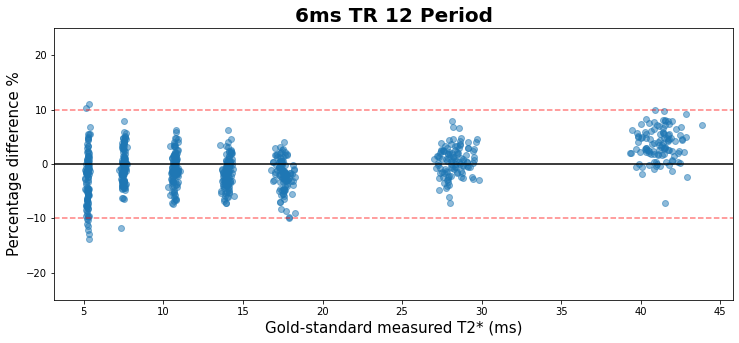

In [5]:

def bland_altman_plot(data1, data2, ax_BA, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = (data1 - data2)/data1*100                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd

    ax_BA.scatter(data1*1000, diff, *args, **kwargs, alpha = 0.5)
    # ax_BA.axhline(md,           color='black', linestyle='-')
    # ax_BA.axhline(md + 1.96*sd, color='red', linestyle='--', alpha = 0.5)
    # ax_BA.axhline(md - 1.96*sd, color='red', linestyle='--', alpha =0.5)
    ax_BA.axhline(0,           color='black', linestyle='-')
    ax_BA.axhline(10, color='red', linestyle='--', alpha = 0.5)
    ax_BA.axhline(-10, color='red', linestyle='--', alpha =0.5)
    return md, sd, mean, CI_low, CI_high
###-------------------------------------------------------------------

chosedNum = [11,10,4,5,3,7,9]
tr = 6
fa = 90
N = 12
echonum = 12


###Gold standard
#print(str(tr)+"_"+str(fa))
GOLDSTD_mean = np.asarray([], dtype = float)
GOLDSTD_std = np.asarray([], dtype = float)

GOLDstd_T2Star = np.load("RESULT/GOLDstandardT2Star"+str(tr)+"TR_"+str(fa)+"FA_T2StarValue_"+str(echonum)+".npy")
NPeriod_T2Star =  np.load("RESULT/NPeriodicT2Star"+str(tr)+"TR_"+str(N)+"_Period_T2StarValue.npy")


BA_plot, ax = plt.subplots(1,figsize = (13,5))
#BA_plot.suptitle(str(tr)+" ms TR (Bland-Altman Plot)", fontweight='bold', fontsize = 20)

###Gold standard
#print(str(tr)+"_"+str(fa))
GOLDSTD_mean = np.asarray([], dtype = float)
GOLDSTD_std = np.asarray([], dtype = float)
GOLDSTD_data = np.asarray([], dtype = float)
i = 0

ax_BA = ax
i = i+1
###N Periodic 
N_Period_data = np.asarray([], dtype = float)
N_Period_mean = np.asarray([], dtype = float)
N_Period_std = np.asarray([], dtype = float)

for phantomNum in chosedNum:
    GOLDSTD_data = np.append(GOLDSTD_data, GOLDstd_T2Star[phantomNum-1,:])
    GOLDSTD_mean = np.append(GOLDSTD_mean, np.mean(GOLDstd_T2Star[phantomNum-1,:]))
    GOLDSTD_std = np.append(GOLDSTD_std, np.std(GOLDstd_T2Star[phantomNum-1,:]))
 
    N_Period_data = np.append(N_Period_data, NPeriod_T2Star[phantomNum-1,:])
    N_Period_mean = np.append(N_Period_mean, np.mean(NPeriod_T2Star[phantomNum-1,:]))
    N_Period_std = np.append(N_Period_std, np.std(NPeriod_T2Star[phantomNum-1,:]))




md, sd, mean, CI_low, CI_high = bland_altman_plot(GOLDSTD_data, N_Period_data, ax_BA)
#ax_BA.set_title(str(P)+" Period "+ str(tr)+"ms TR", fontweight='bold')
plt.title(str(tr)+"ms TR "+str(N)+" Period", fontweight='bold',fontsize = 20)
plt.xlabel("Gold-standard measured T2* (ms)",fontsize = 15)
plt.ylabel("Percentage difference %",fontsize = 15)


xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14

# plt.text(xOutPlot, md - 1.96*sd, 
#     r'-1.96SD:' + "\n" + "%.4f" % CI_low, 
#     ha = "left",
#     va = "center",
#     )
# plt.text(xOutPlot, md + 1.96*sd, 
#     r'+1.96SD:' + "\n" + "%.4f" % CI_high, 
#     ha = "left",
#     va = "center",
#     )
# plt.text(xOutPlot, md, 
#     r'Mean:' + "\n" + "%.4f" % md, 
#     ha = "left",
#     va = "center",
#     )
plt.subplots_adjust(right=0.85)
plt.ylim(-25,25)
# plt.xlim(0,0.045)


#ax_BA.figure.savefig("Bland_Altman_Plots/Bland_Altman_Plot_"+str(tr)+"_TR_ALLPeriod_NEW.jpg")
#ax_BA.figure.savefig("Bland_Altman_Plots/Bland_Altman_Plot_"+str(P)+"Period_"+str(tr)+"_TR_v2.jpg")
#ax_BA.show()

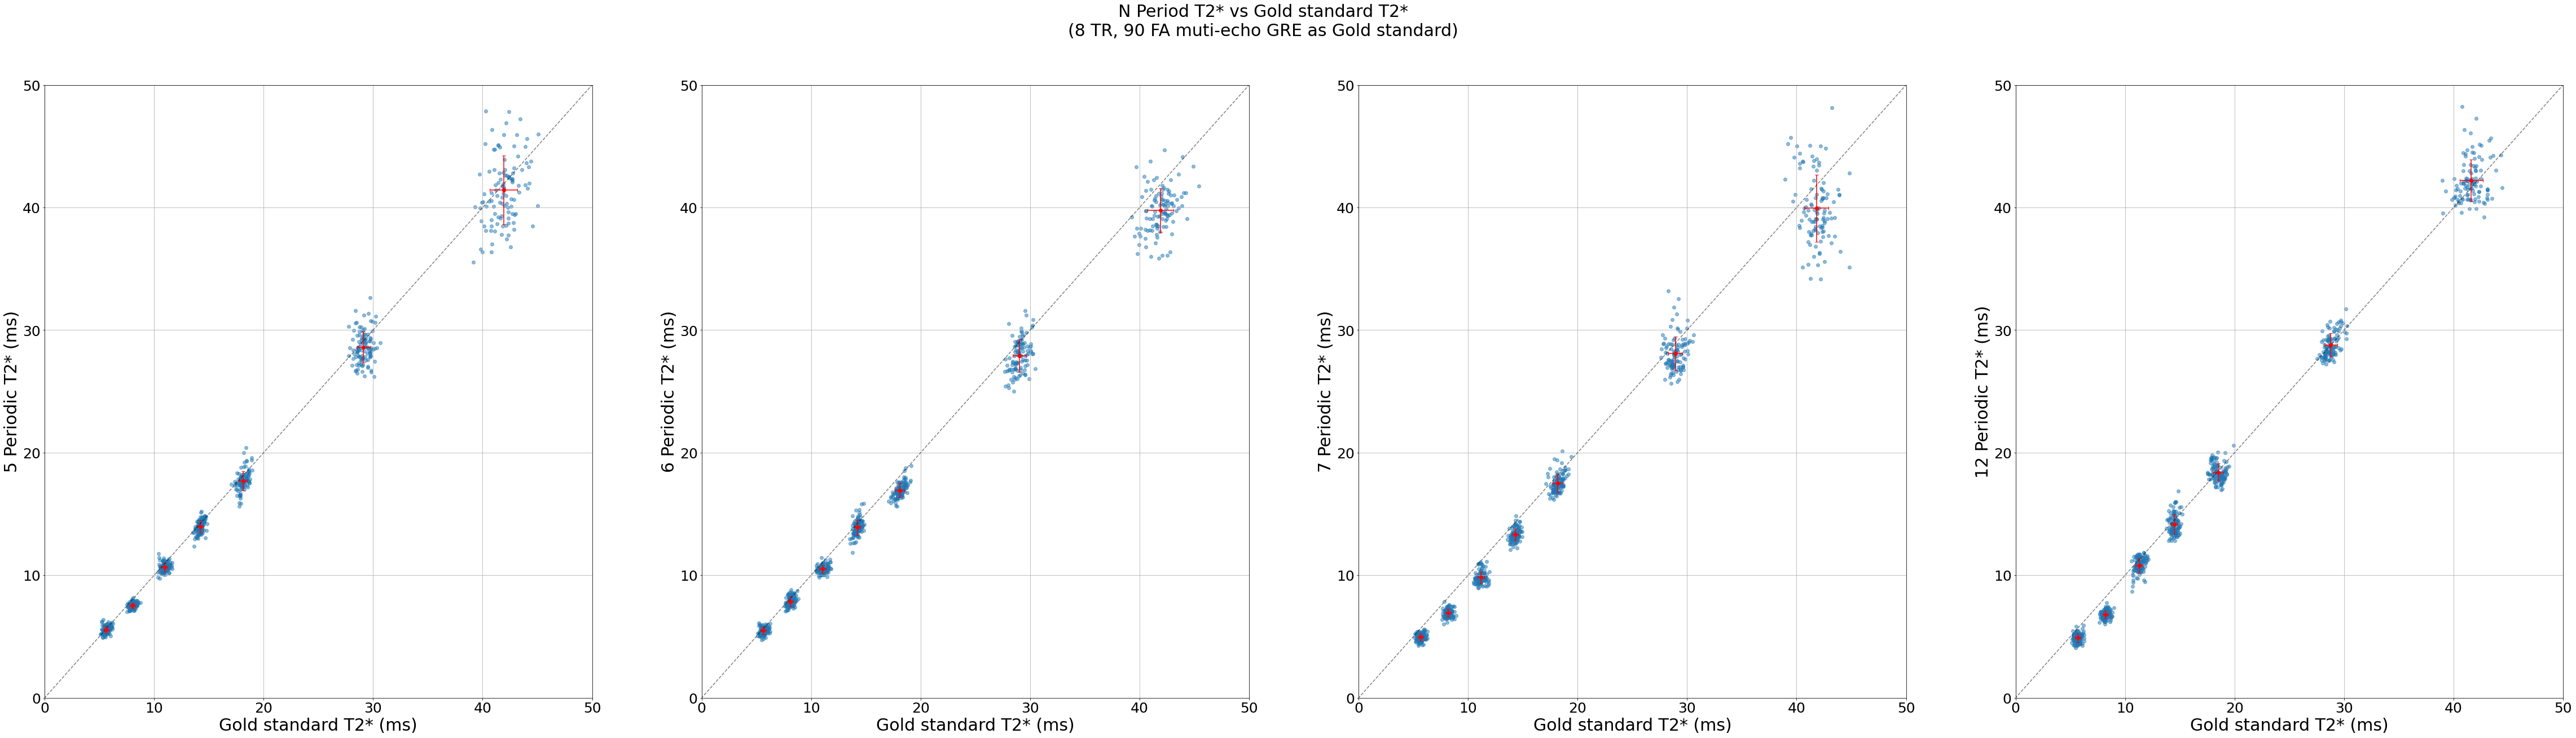

In [100]:
chosedNum = [11,10,4,5,3,7,9]
tr = 8
fa = 90
Period = [5,6,7,12]
echonum = [5,6,7,10]
figure, ax = plt.subplots(1,4,figsize = (80,20))
figure.suptitle("N Period T2* vs Gold standard T2*\n("+str(tr)+" TR, "+str(fa)+" FA muti-echo GRE as Gold standard)", fontsize = 30)
ax_count = 0
for N in Period:
    ###Gold standard
    #print(str(tr)+"_"+str(fa))
    GOLDSTD_mean = np.asarray([], dtype = float)
    GOLDSTD_std = np.asarray([], dtype = float)

    GOLDstd_T2Star = np.load("RESULT/GOLDstandardT2Star"+str(tr)+"TR_"+str(fa)+"FA_T2StarValue_"+str(echonum[ax_count])+".npy")
    NPeriod_T2Star =  np.load("RESULT/NPeriodicT2Star"+str(tr)+"TR_"+str(N)+"_Period_T2StarValue.npy")

    ###Gold standard
    #print(str(tr)+"_"+str(fa))
    GOLDSTD_mean = np.asarray([], dtype = float)
    GOLDSTD_std = np.asarray([], dtype = float)
    GOLDSTD_data = np.asarray([], dtype = float)

    ###N Periodic 
    N_Period_data = np.asarray([], dtype = float)
    N_Period_mean = np.asarray([], dtype = float)
    N_Period_std = np.asarray([], dtype = float)

    for phantomNum in chosedNum:
        GOLDSTD_data = np.append(GOLDSTD_data, GOLDstd_T2Star[phantomNum-1,:])
        GOLDSTD_mean = np.append(GOLDSTD_mean, np.mean(GOLDstd_T2Star[phantomNum-1,:]))
        GOLDSTD_std = np.append(GOLDSTD_std, np.std(GOLDstd_T2Star[phantomNum-1,:]))

        N_Period_data = np.append(N_Period_data, NPeriod_T2Star[phantomNum-1,:])
        N_Period_mean = np.append(N_Period_mean, np.mean(NPeriod_T2Star[phantomNum-1,:]))
        N_Period_std = np.append(N_Period_std, np.std(NPeriod_T2Star[phantomNum-1,:]))


    ax[ax_count].scatter(GOLDSTD_data*1e3, N_Period_data*1e3, alpha = 0.5)

    ax[ax_count].errorbar(GOLDSTD_mean*1e3,N_Period_mean*1e3, c = 'r', fmt='o', yerr=N_Period_std*1e3,xerr = GOLDSTD_std*1e3, capsize=3)
    x1 = np.array([-10,60])
    y1 = np.array([-10,60])
    ax[ax_count].plot(x1,y1,'^k--', alpha = 0.5)
    ax[ax_count].set_xlim(0,50)
    ax[ax_count].set_ylim(0,50)
    ax[ax_count].tick_params(axis = 'x', labelsize = 25)
    ax[ax_count].tick_params(axis = 'y', labelsize = 25)
    ax[ax_count].grid()
    ax[ax_count].set_xlabel("Gold standard T2* (ms)", fontsize = 30)
    ax[ax_count].set_ylabel(str(N)+" Periodic T2* (ms)", fontsize = 30)
    ax_count = ax_count+1
figure.savefig("RESULT/Measured_GT_plot"+str(tr)+"TR_"+str(fa)+"FA.jpg")

### quantitative T2* Map

(0,)

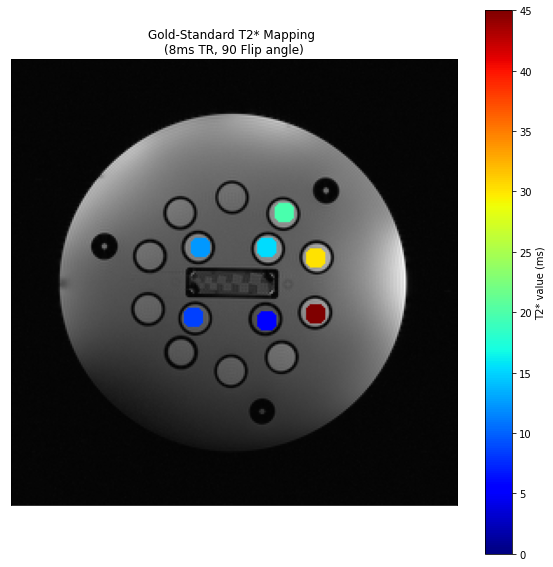

In [2]:
#GOlD Standard Data
# Define colormap
cmap = plt.cm.jet

chosedNum = [11,10,4,5,3,7,9]
#chosedNum = [11,10,4,5,3,7,9,13,14,12]

tr = 8
#gold standard
fa = 90

STANDARD_MASK_LABEL = np.load("RESULT/MASKLABEL_4.npy")

DICOM1 = 'recon/multiecho_FLASH/tr'+str(tr)+'_fa'+str(fa)+'_echo1.dcm'
#LOAD DICOM DATA
#For grayscale - 3 layer all equal
img = pydicom.read_file(DICOM1)
GOLDSTD_DATA = img.pixel_array.reshape((256,256,1))
GOLDSTD_DATA = GOLDSTD_DATA/np.max(GOLDSTD_DATA)
GOLDSTD_DATA = np.append(GOLDSTD_DATA, GOLDSTD_DATA, axis = 2)
GOLDSTD_DATA = np.append(GOLDSTD_DATA, GOLDSTD_DATA[:,:,0].reshape((256,256,1)), axis = 2)

#T2* data value
T2StarData = np.load("RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
#add as rgb in the array

GOLDSTD_data = np.asarray([], dtype = float)
Quantitative_data = np.zeros((np.shape(GOLDSTD_DATA)[0],np.shape(GOLDSTD_DATA)[1]))
for phantom_num in chosedNum:
    count = 0
    for i in range (0,256):
        for j in range (0,256):
            if(STANDARD_MASK_LABEL[i,j]== (phantom_num)):
                # Get the RGBA values for the colormap at each value
                Quantitative_data[i,j] = T2StarData[phantom_num-1,count]

for phantom_num in chosedNum:
    count = 0
    for i in range (0,256):
        for j in range (0,256):
            if(STANDARD_MASK_LABEL[i,j]== (phantom_num)):
                # Get the RGBA values for the colormap at each value
                #Quantitative_data[i,j] = T2StarData[phantom_num-1,count]
                rgba_values = cmap(Quantitative_data[i,j]/np.max(Quantitative_data))
                GOLDSTD_DATA[i,j,:] = rgba_values[:3]
                count = count + 1

plt.figure(1,figsize=(10,10))
plt.title("Gold-Standard T2* Mapping \n("+str(tr)+"ms TR, "+str(fa)+" Flip angle)")
plt.imshow(Quantitative_data*1e3, cmap = cmap, vmax = 45, vmin = 0)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.colorbar(label='T2* value (ms)')
plt.imshow(GOLDSTD_DATA)
np.shape(GOLDSTD_data)
#plt.savefig("T2StarMaps/GOLDSTD"+str(tr)+"_TR_"+str(fa)+"_FA_T2StarMap.jpg")

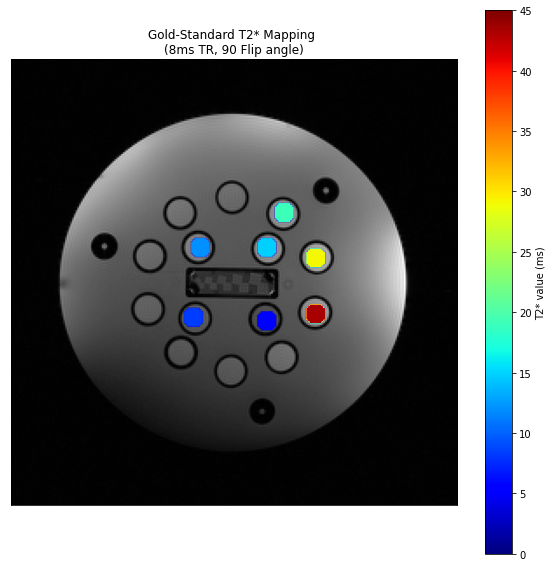

In [12]:
#GOlD Standard Data
# Define colormap
cmap = plt.cm.jet

chosedNum = [11,10,4,5,3,7,9]
#chosedNum = [11,10,4,5,3,7,9,13,14,12]

tr = 8
#gold standard
fa = 90

STANDARD_MASK_LABEL = np.load("RESULT/MASKLABEL_4.npy")

DICOM1 = 'Data_dicom/multiecho_FLASH/tr'+str(tr)+'_fa'+str(fa)+'_echo1.dcm'
#LOAD DICOM DATA
#For grayscale - 3 layer all equal
img = pydicom.read_file(DICOM1)
GOLDSTD_DATA = img.pixel_array.reshape((256,256,1))
GOLDSTD_DATA = GOLDSTD_DATA/np.max(GOLDSTD_DATA)

#T2* data value
T2StarData = np.load("RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
#add as rgb in the array

Quantitative_data = np.zeros((np.shape(GOLDSTD_DATA)[0],np.shape(GOLDSTD_DATA)[1]))

for phantom_num in chosedNum:
    count = 0
    for i in range (0,256):
        for j in range (0,256):
            if(STANDARD_MASK_LABEL[i,j]== (phantom_num)):
                # Get the RGBA values for the colormap at each value
                Quantitative_data[i,j] = T2StarData[phantom_num-1,count]



plt.figure(1,figsize=(10,10))
plt.imshow(GOLDSTD_DATA,'gray')
plt.title("Gold-Standard T2* Mapping \n("+str(tr)+"ms TR, "+str(fa)+" Flip angle)")
plt.imshow(Quantitative_data*1e3, cmap = cmap, alpha = 1.0*(Quantitative_data>0), vmax = 45, vmin = 0)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.colorbar(label='T2* value (ms)')


#plt.savefig("T2StarMaps/GOLDSTD"+str(tr)+"_TR_"+str(fa)+"_FA_T2StarMap.jpg")

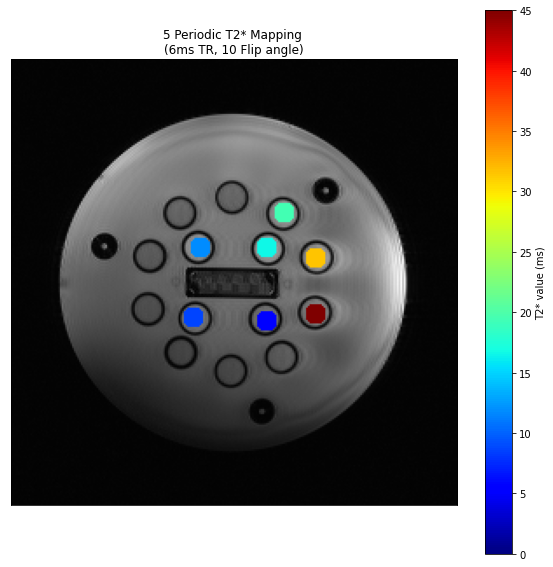

In [26]:
#N Period Data
# Define colormap
cmap = plt.cm.jet

chosedNum = [11,10,4,5,3,7,9]
#chosedNum = [11,10,4,5,3,7,9,13,14,12]
tr = 6
Period = 5
fa = 10
GOLDSTD_data = np.asarray([], dtype = float)

STANDARD_MASK_LABEL = np.load("RESULT/MASKLABEL_4.npy")
DICOM1 = 'Data_dicom/n_periodic/tr'+str(tr)+'_n'+str(Period)+'_echo1.dcm'
#LOAD DICOM DATA

#For grayscale - 3 layer all equal
img = pydicom.read_file(DICOM1)
GOLDSTD_DATA = img.pixel_array.reshape((256,256,1))
GOLDSTD_DATA = GOLDSTD_DATA/np.max(GOLDSTD_DATA)
GOLDSTD_DATA = np.append(GOLDSTD_DATA, GOLDSTD_DATA, axis = 2)
GOLDSTD_DATA = np.append(GOLDSTD_DATA, GOLDSTD_DATA[:,:,0].reshape((256,256,1)), axis = 2)

# #T2* data value
T2StarData = np.load("RESULT/NPeriodicT2Star/"+str(tr)+"TR_"+str(Period)+"_Period_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
#add as rgb in the array

Quantitative_data = np.zeros((np.shape(GOLDSTD_DATA)[0],np.shape(GOLDSTD_DATA)[1]))
for phantom_num in chosedNum:
    count = 0
    for i in range (0,256):
        for j in range (0,256):
            if(STANDARD_MASK_LABEL[i,j]== (phantom_num)):
                # Get the RGBA values for the colormap at each value
                Quantitative_data[i,j] = T2StarData[phantom_num-1,count]

for phantom_num in chosedNum:
    count = 0
    for i in range (0,256):
        for j in range (0,256):
            if(STANDARD_MASK_LABEL[i,j]== (phantom_num)):
                # Get the RGBA values for the colormap at each value
                #Quantitative_data[i,j] = T2StarData[phantom_num-1,count]
                rgba_values = cmap(Quantitative_data[i,j]/np.max(Quantitative_data))
                GOLDSTD_DATA[i,j,:] = rgba_values[:3]
                count = count + 1

plt.figure(1,figsize=(10,10))
plt.title(str(Period)+" Periodic T2* Mapping \n("+str(tr)+"ms TR, "+str(fa)+" Flip angle)")
plt.imshow(Quantitative_data*1e3, cmap = cmap, vmax = 45, vmin = 0)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.colorbar(label='T2* value (ms)')
plt.imshow(GOLDSTD_DATA)

#plt.savefig("T2StarMaps/NPeriod"+str(tr)+"_TR_"+str(Period)+"_Period_T2StarMap.jpg")

### Simply Read Data code
Show mean and standard deviation for each fiducial sphere

In [2]:
TR = [6, 8]
FA = [20,40,60,90]
chosedNum = [11,10,4,5,3,7,9,13,14]
print("Gold standard Multi-echo FLASH")
for tr in TR:
    for fa in FA:
        print("TR = "+str(tr))
        print("Flip angle:"+str(fa))
        X = np.load("RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
        for phantomNum in chosedNum:
            print("mean:"+str(np.mean(X[phantomNum-1,:]))+"_sd:"+str(np.std(X[phantomNum-1,:])))
        

6_20
mean:0.005442608729182234_sd:0.0002401758307625024
mean:0.007517677661331108_sd:0.0002686222922006897
mean:0.01087673199115423_sd:0.00028590609386591244
mean:0.01498722892581147_sd:0.00035446889584138624
mean:0.019368255732237404_sd:0.00037592782732784384
mean:0.029458345565755027_sd:0.0009112961922037785
mean:0.04113658301353197_sd:0.0011064673786922421
mean:0.056626294415017035_sd:0.0027315471955716986
mean:0.08361566020918969_sd:0.005530006259350173
6_40
mean:0.00513061065894358_sd:0.00010753797411195661
mean:0.007400255286519588_sd:0.0001711753315426531
mean:0.010653172276286713_sd:0.00015136689702494483
mean:0.014416835449417187_sd:0.00023919546220708634
mean:0.018661211576748656_sd:0.0003605912320203521
mean:0.028546786948032157_sd:0.0005863692798069562
mean:0.04090568074908653_sd:0.0006598240782269223
mean:0.058445095457041005_sd:0.002673545778024501
mean:0.08145333518721239_sd:0.004898322660979317
6_60
mean:0.005156461241332889_sd:7.61219462373767e-05
mean:0.00749354718287

In [ ]:
Period = [5,6,7,12]
TR = [6,8]
NPeriodData = np.asarray([], dtype = float) # in the order #11, #10, #4
chosedNum = [11,10,4,5,3,7,9,13,14]
print("N-periodic ka-SPGR")
for tr in TR:
    for P in Period:
        print("Period = "+str(P))
        print("TR = "+str(tr))
        X = np.load("RESULT/NPeriodicT2Star/"+str(tr)+"TR_"+str(P)+"_Period_10FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
        for phantomNum in chosedNum:
            print("mean:"+str(np.mean(X[phantomNum-1,:]))+"_sd:"+str(np.std(X[phantomNum-1,:])))
        

6_5
mean:0.0052218552614118645_sd:0.00021672509424246466
mean:0.007310434642650987_sd:0.00022770799059259144
mean:0.010419790373586991_sd:0.00032302621071759243
mean:0.013848101724706447_sd:0.0006516793707316528
mean:0.017577000724499928_sd:0.0009939225699218239
mean:0.028129594427732784_sd:0.0017739840340662335
mean:0.03996540088387927_sd:0.0028465927920815447
mean:0.05792664828308823_sd:0.008863124644210758
mean:0.08401457442341016_sd:0.01727065183728065
6_6
mean:0.005249698931973036_sd:0.00017431652205977287
mean:0.0075577678946597724_sd:0.00023181714988415678
mean:0.010684423676404858_sd:0.0004092545814937378
mean:0.014836938313065819_sd:0.0007372877930493639
mean:0.017671641699886817_sd:0.0008037010316134116
mean:0.029203416923483935_sd:0.0014243038908167839
mean:0.04220538245803587_sd:0.002841418217568652
mean:0.06287514893683702_sd:0.01790674860241155
mean:0.13404888818037702_sd:0.23701207342719116
6_7
mean:0.005148643281862777_sd:0.00018404425406099218
mean:0.007331782520998606